In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [2]:
df = pd.read_csv("ITC_data.csv")

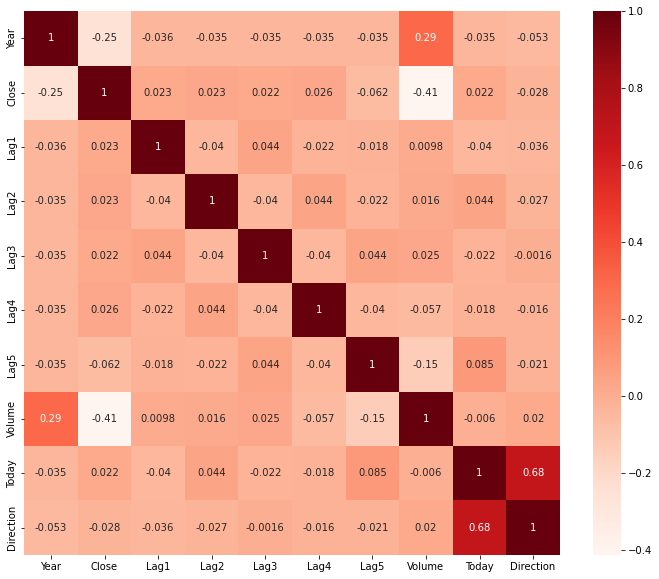

In [3]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor , annot=True,cmap=plt.cm.Reds)
plt.show()

In [4]:
df.head()

,Year,Close,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2017,265.30,0.01308,-0.00632,0.02036,-0.00038,-0.00151,9506715.0,0.00680,1
1,2017,265.40,0.00680,0.01308,-0.00632,0.02036,-0.00038,5957114.0,0.01275,1
2,2017,260.05,0.01275,0.00680,0.01308,-0.00632,0.02036,20246351.0,-0.00708,0
3,2017,261.70,-0.00708,0.01275,0.00680,0.01308,-0.00632,16792035.0,-0.01130,0
4,2017,258.30,-0.01130,-0.00708,0.01275,0.00680,0.01308,7396182.0,-0.00464,0


In [5]:
df

,Year,Close,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2017,265.300000,0.013080,-0.006320,0.020360,-0.000380,-0.00151,9506715.0,0.006800,1
1,2017,265.400000,0.006800,0.013080,-0.006320,0.020360,-0.00038,5957114.0,0.012750,1
2,2017,260.050000,0.012750,0.006800,0.013080,-0.006320,0.02036,20246351.0,-0.007080,0
3,2017,261.700000,-0.007080,0.012750,0.006800,0.013080,-0.00632,16792035.0,-0.011300,0
4,2017,258.300000,-0.011300,-0.007080,0.012750,0.006800,0.01308,7396182.0,-0.004640,0
...,...,...,...,...,...,...,...,...,...,...
1225,2022,345.600000,0.000000,0.001440,0.004030,-0.006060,0.01179,27372160.0,-0.008350,0
1226,2022,347.700000,-0.008350,0.000000,0.001440,0.004030,-0.00606,3170564.0,-0.002290,0
1227,2022,346.300000,-0.002290,-0.008350,0.000000,0.001440,0.00403,17242211.0,-0.014630,0
1228,2022,345.800000,-0.014630,-0.002290,-0.008350,0.000000,0.00144,18558597.0,0.002680,1


In [6]:
X = df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume','Today']]
Y = df[['Direction']]

In [7]:
from statsmodels.multivariate.manova import MANOVA

In [8]:
maov = MANOVA.from_formula('X ~ Y',data=df)

In [9]:
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.4456 1.0000 1228.0000 1527.5972 0.0000
         Pillai's trace 0.5544 1.0000 1228.0000 1527.5972 0.0000
 Hotelling-Lawley trace 1.2440 1.0000 1228.0000 1527.5972 0.0000
    Roy's greatest root 1.2440 1.0000 1228.0000 1527.5972 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
           Y            Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.5252 1.0000 1228.0000 1110.1421 0.0000
         Pillai's trace 0.4748 1.0000 1228.00

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.20 , shuffle=False)

In [12]:
print(np.unique(y_train,return_counts=True))

(array([0, 1], dtype=int64), array([469, 515], dtype=int64))


In [13]:
lda = LinearDiscriminantAnalysis()
model = lda.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
print(model.priors_)

[0.47662602 0.52337398]


In [15]:
print(model.means_)

[[ 7.96311301e-04  7.68251599e-04  5.70063966e-04  3.68933902e-04
   6.07356077e-04  1.97684309e+07 -1.21079531e-02]
 [-4.72737864e-04 -4.31805825e-04 -1.76330097e-04 -2.12038835e-05
  -2.52000000e-04  2.01531268e+07  1.12624078e-02]]


In [16]:
print(model.coef_)

[[-2.20160147e+00 -1.34906602e+01  1.00671370e+00 -1.07367885e+00
  -1.89911984e+01  2.00181107e-09  1.41702318e+02]]


In [17]:
print(model.explained_variance_ratio_)

[1.]


In [18]:
pred=model.predict(x_test)
print(np.unique(pred,return_counts=True))

(array([0, 1], dtype=int64), array([136, 110], dtype=int64))


In [19]:
print(confusion_matrix(pred,y_test))
print(classification_report(y_test,pred,digits=2))

[[132   4]
 [ 11  99]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       143
           1       0.90      0.96      0.93       103

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



In [20]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(x_train,y_train)
print(model2.priors_)
print(model2.means_)

[0.47662602 0.52337398]
[[ 7.96311301e-04  7.68251599e-04  5.70063966e-04  3.68933902e-04
   6.07356077e-04  1.97684309e+07 -1.21079531e-02]
 [-4.72737864e-04 -4.31805825e-04 -1.76330097e-04 -2.12038835e-05
  -2.52000000e-04  2.01531268e+07  1.12624078e-02]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
pred2 = model2.predict(x_test)
print(np.unique(pred2,return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

(array([0, 1], dtype=int64), array([133, 113], dtype=int64))
[[126   7]
 [ 17  96]]
              precision    recall  f1-score   support

           0      0.947     0.881     0.913       143
           1      0.850     0.932     0.889       103

    accuracy                          0.902       246
   macro avg      0.898     0.907     0.901       246
weighted avg      0.906     0.902     0.903       246

